### Project 1 — Simulate and Plot Distributions
##### Goal
* Generate Normal, Binomial, Exponential data
* Plot histograms
* Compare mean and variance

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 10000


### Generate datasets

In [4]:
normal_data = np.random.normal(loc=0,scale=1,size=n)
binomial_data = np.random.binomial(n=10,p=0.5,size=n)
exponential_data = np.random.exponential(scale=1.0,size=n)

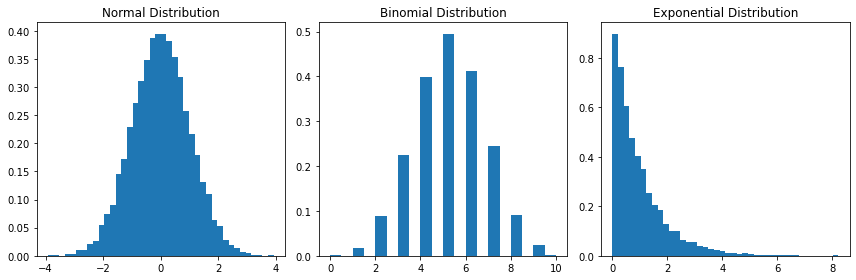

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(normal_data,bins=40,density=True)
plt.title("Normal Distribution")

plt.subplot(1,3,2)
plt.hist(binomial_data,bins=20,density=True)
plt.title("Binomial Distribution")

plt.subplot(1,3,3)
plt.hist(exponential_data,bins=40,density=True)
plt.title("Exponential Distribution")

plt.tight_layout()
plt.show()

In [7]:
def summarize(data,name):
    print(f"{name}: Mean = {np.mean(data):.3f}, Variance={np.var(data):.3f}")
    
summarize(normal_data,"Normal")
summarize(binomial_data,"Binomial")
summarize(exponential_data,"Exponential")

Normal: Mean = -0.002, Variance=1.007
Binomial: Mean = 5.039, Variance=2.530
Exponential: Mean = 0.987, Variance=0.980


### Project 2 — Correlation Analysis
#### Goal
* Load real dataset
* Compute correlation matrix
* Identify highly correlated features

Load Iris dataset

In [8]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
corr_matrix = df.corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Identify highly correlated feature pairs

In [10]:
high_corr = []

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i!=j and abs(corr_matrix.loc[i,j])>0.8:
            high_corr.append((i,j, corr_matrix.loc[i,j]))
            
high_corr

[('sepal length (cm)', 'petal length (cm)', 0.8717537758865838),
 ('sepal length (cm)', 'petal width (cm)', 0.8179411262715758),
 ('petal length (cm)', 'sepal length (cm)', 0.8717537758865838),
 ('petal length (cm)', 'petal width (cm)', 0.962865431402796),
 ('petal width (cm)', 'sepal length (cm)', 0.8179411262715758),
 ('petal width (cm)', 'petal length (cm)', 0.962865431402796)]

#### ML intuition
* Strong correlations → multicollinearity
* PCA or feature removal may help

### Project 3 — Monte Carlo Simulation

#### Example 1: Probability of rolling a die > 4

In [15]:
trials = 1_000_000
rolls = np.random.randint(1,7,size=trials)

probability = np.mean(rolls>4)
probability 

0.333212

#### Example 2: Estimate π using random sampling

In [18]:
N = 1_000_000
x = np.random.uniform(-1,1,N)
y = np.random.uniform(-1,1,N)

inside_circel = x**2 + y**2 <=1
pi_estimate = 4*np.mean(inside_circel)

pi_estimate


3.13938

#### Example 3: Expected rainfall event probability

Assume:
* Rainfall event occurs if rainfall > 50 mm
* Rainfall follows an exponential-like distribution

In [19]:
rainfall = np.random.exponential(scale=20,size=500_000)
prob_heavy_rain = np.mean(rainfall>50)
prob_heavy_rain

0.081422

#### ML intuition:
* Monte Carlo is used when analytical probability is hard
* Widely used in risk modeling and simulation-based ML

### Project 4 — Simple Hypothesis Test (Crop Yield)
Scenario

Two farming methods produce crop yields.
Are they significantly different?

In [20]:
from scipy.stats import ttest_ind

np.random.seed(42)

yield_method_A = np.random.normal(30,3,50)
yield_method_B = np.random.normal(33,3,50)

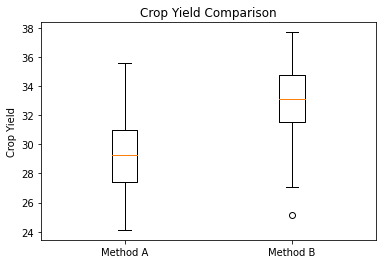

In [23]:
# Visual comparison
import matplotlib.pyplot as plt

plt.boxplot([yield_method_A,yield_method_B],labels=["Method A","Method B"])
plt.ylabel("Crop Yield")
plt.title("Crop Yield Comparison")
plt.show()

### t-test

In [24]:
t_stat,p_value = ttest_ind(yield_method_A,yield_method_B)

t_stat,p_value

(-6.872731683285838, 5.877565294167762e-10)

#### Interpretation
* p-value < 0.05 → statistically significant difference
* p-value ≥ 0.05 → difference may be due to chance

### Optional: Confidence Interval comparison

In [27]:
def confidence_interval(data):
    mean = np.mean(data)
    std = np.std(data,ddof=1)
    n = len(data)
    margin = 1.96*std/np.sqrt(n)
    return mean - margin,mean+margin

confidence_interval(yield_method_A), confidence_interval(yield_method_B)

(32.326291045338685, 33.78039417746903)

#### Learning Outcomes
* Distribution behavior and assumptions
* Correlation and multicollinearity
* Monte Carlo reasoning
* Hypothesis testing intuition